# Simulation 9 - Plotting NS3 Results

TJ Kim
8/13/20

Take CSV from youngbin and plot.

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim9")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

In [2]:
import pandas as pd
data = pd.read_csv(os.path.curdir + "/sim_store/sim9/result.csv", error_bad_lines=False)

In [39]:
data

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Plan4,Unnamed: 13,Unnamed: 14
0,0,0,2.553980,NaN,0,0,2.55398,NaN,0,0,2.55398,NaN,0,0,2.55398
1,0,1,2.554660,NaN,0,1,2.55466,NaN,0,1,2.55466,NaN,0,1,2.55466
2,0,2,2.553010,NaN,0,2,2.55301,NaN,0,2,2.55301,NaN,0,2,2.55301
3,0,3,0.613128,NaN,0,3,2.55313,NaN,0,3,2.55313,NaN,0,3,2.55313
4,0,4,2.553590,NaN,0,4,2.55359,NaN,0,4,2.55359,NaN,0,4,2.55359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,9,14,2.593750,NaN,9,14,2.59375,NaN,9,14,2.68075,NaN,9,14,2.60775
187,9,15,2.593330,NaN,9,15,2.59333,NaN,9,15,2.59933,NaN,9,15,2.59133
188,9,16,2.553530,NaN,9,16,2.55353,NaN,9,16,2.55353,NaN,9,16,1.07853
189,9,17,5.386950,NaN,9,17,5.38695,NaN,9,17,2.22095,NaN,9,17,4.79995


### Timestep vs. transmission time

Plot transmission time for each plan per timestep.

In [77]:
# Obtain all the plans transmission time
batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"])
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"])
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"])
Naive_seconds = pd.DataFrame.to_numpy(data["Unnamed: 14"])

# Pring All the plan average seconds
print("Batch mean (s):", np.mean(batch_seconds[batch_seconds<2]))
print("SG mean (s):", np.mean(SG_seconds[SG_seconds<2]))
print("Myopic mean (s):", np.mean(Myopic_seconds[Myopic_seconds<2]))
print("Naive mean (s):", np.mean(Naive_seconds[Naive_seconds<2]))

# print("Batch mean (s):", np.mean(batch_seconds))
# print("SG mean (s):", np.mean(SG_seconds))
# print("Myopic mean (s):", np.mean(Myopic_seconds))
# print("Naive mean (s):", np.mean(Naive_seconds))

Batch mean (s): 0.7485019487179487
SG mean (s): 0.7262013653846153
Myopic mean (s): 0.8884485789473684
Naive mean (s): 1.026963523076923


In [63]:
# Get time steps
timesteps = pd.DataFrame.to_numpy(data["Plan1"])
temp_ts = {}

for i in range(10):
    temp_ts[i] = np.where(timesteps == i)

In [64]:
plans = {}
plans[0] = []
plans[1] = []
plans[2] = []
plans[3] = []

seconds = {}
seconds[0] = SG_seconds
seconds[1] = batch_seconds
seconds[2] = Myopic_seconds
seconds[3] = Naive_seconds

for p in range(4):
    for t in range(10):
        plans[p] += [np.mean(seconds[p][temp_ts[t]])]

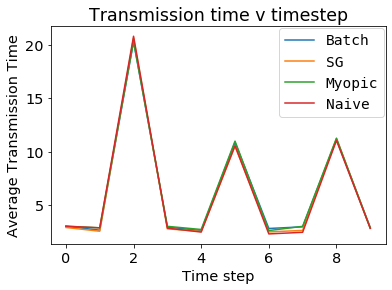

In [65]:
from matplotlib.pyplot import figure

plt.plot(range(10), plans[1], label = 'Batch')
plt.plot(range(10), plans[0], label = 'SG')
plt.plot(range(10), plans[2], label = 'Myopic')
plt.plot(range(10), plans[3], label = 'Naive')

plt.ylabel('Average Transmission Time')
plt.title('Transmission time v timestep')
plt.xlabel('Time step')
plt.legend(borderaxespad=0.1,loc = "upper right",prop={'family': 'DejaVu Sans Mono'})



### Completion Time CDF

In [78]:
# Batch
b_density = stats.gaussian_kde(batch_seconds)
b_xs = np.linspace(0.1,2,15)
b_density.covariance_factor = lambda : 0.01
b_density._compute_covariance()
dx = b_xs[1]-b_xs[0]
b_data = b_density(b_xs)
b_data /= (dx * b_data).sum()
b_cdf = np.cumsum(b_data* (dx))

# SG
s_density = stats.gaussian_kde(SG_seconds)
s_xs = np.linspace(0.1,2,15)
s_density.covariance_factor = lambda : 0.01
s_density._compute_covariance()

dx = s_xs[1]-s_xs[0]
s_data = s_density(s_xs)
s_data /= (dx * s_data).sum()
s_cdf = np.cumsum(s_data* (dx))

# Myopic
m_density = stats.gaussian_kde(Myopic_seconds)
m_xs = np.linspace(0.1,2,15)
m_density.covariance_factor = lambda : 0.01
m_density._compute_covariance()

dx = m_xs[1]-m_xs[0]
m_data = m_density(m_xs)
m_data /= (dx * m_data).sum()
m_cdf = np.cumsum(m_data* (dx))

# Naive
n_density = stats.gaussian_kde(Naive_seconds)
n_xs = np.linspace(0.1,2,15)
n_density.covariance_factor = lambda : 0.01
n_density._compute_covariance()

dx = n_xs[1]-n_xs[0]
n_data = n_density(n_xs)
n_data /= (dx * n_data).sum()
n_cdf = np.cumsum(n_data* (dx))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


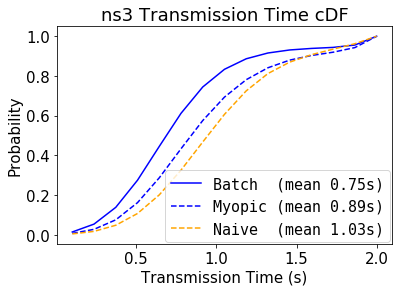

In [82]:
from matplotlib.pyplot import figure

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)


# Plot PDF
# plt.plot(b_xs, b_density(b_xs), label = 'Batch')
# plt.plot(s_xs, s_density(s_xs), label = 'SG')
# plt.plot(m_xs, m_density(m_xs), label = 'Myopic')
# plt.plot(n_xs, n_density(n_xs), label = 'Naive')

# figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')


# Plot CDF
plt.plot(b_xs, b_cdf, label = 'Batch  (mean 0.75s)', color = 'blue')
# plt.plot(s_xs, s_cdf, label = 'SG     (mean 0.73s)', color = 'orange')
plt.plot(m_xs, m_cdf, label = 'Myopic (mean 0.89s)', color = 'blue', linestyle='dashed')
plt.plot(n_xs, n_cdf, label = 'Naive  (mean 1.03s)', color = 'orange', linestyle='dashed')
# plt.xscale('log')

plt.ylabel('Probability')
plt.title('ns3 Transmission Time cDF')
plt.xlabel('Transmission Time (s)')
plt.legend(borderaxespad=0.1,loc = "lower right",prop={'family': 'DejaVu Sans Mono'})


# plt.ylim(-.3,1)
plt.show()